# Exploring Maximum Likelihood

In this exercise we're going to explore the concept of maximum likelihood estimation (MLE).

Maximum likelihood estimation is the gold standard methodology for estimating some true parameter from a data set.  For example:

  - We have a coin of unknown fairness, and we want to flip the coin a bunch of times and use the results to figure out the fairness of the coin (first example).
  - We have a chunk of matter that is undergoing radioactive decay (the atoms in the material spontaneously self-destruct at some rate), and we would like to figure out the rate of decay (second example).
  
We will start by using MLE to figure choose between a finite number of possibilities (the truth is one of these ten things, which one of the possibilities is most likely), and will then generalize the method to choosing between an infinite number of possibilities.


# Coin Flips

Let's start with the most mundane (but instructive) example, *flipping coins*!

https://github.com/GalvanizeDataScience/maximum-likelihood

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

3\. Create a numpy array `flip_data` representing this sequence of coin flips.

In [2]:
def flip_coin(n_flips, p=0.6):
    """Flip a coin of fairness p, n times.
    
    Parameters
    ----------
    n: int
      The number of times to flip the coin.

    p: float, between zero and one.
      The probability the coin flips heads.

    Returns
    -------
    flips: np.array of ints
      The results of the coin flips, where 0 is a tail and 1 is a head.
    """
    return stats.binom(n=1, p=p).rvs(int(n_flips))

In [3]:
flips = flip_coin(n_flips = 100, p =0.5); flips

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [8]:
stats.binom(n=1, p=0.6)

0.0

2\. Write a function `coin_log_likelihood` that returns the *logarithm* of the likelihood of `p` given a sequence of coin flips.

In [115]:
def coin_log_likelihood(p, flips):
    """Return the log-likelihood of a parameter p given a sequence of coin flips.
    """
    n = len(flips)
    model = stats.binom(1,p)
    likelihoods = [model.pmf(datum) for datum in flips]
    return np.sum(np.log(likelihoods))/n**2
    
    

In [116]:
coin_log_likelihood(p=.5 , flips=flips)

-0.06931471805599453

4\. Suppose the are *two* coins in the bag, and we are provided with the knowledge that
Use your function to compute the *log-likelihood* of each of these coins given the sequence of coin flips.  Which coin is more likely the one you chose and flipped?  Does this align with your intuition?

In [117]:
flips_ques = [1,0,0,0,1,1,0,0,0,0]
coin_probs = [coin_log_likelihood(p=.5 , flips=flips_ques),coin_log_likelihood(p=.25 , flips=flips_ques)]
coin_probs

[-0.06931471805599453, -0.061726575905221376]

In [118]:
def plot_coin_likelihood(ax, probs, data, title = 'Is the coin fair?'):
    LLs = []
    for p in probs:
        LLs.append( coin_log_likelihood(p, data) )
    
    labels = ['p: {}'.format(p) for p in probs]
    ax.bar(labels,LLs)
    ax.set_ylabel('Log-Likelihoods')
    ax.set_xlabel('Coin Fairness')
    ax.set_title(title)
    return ax
    


In [119]:
probs = [0.1, 0.5, 0.75]

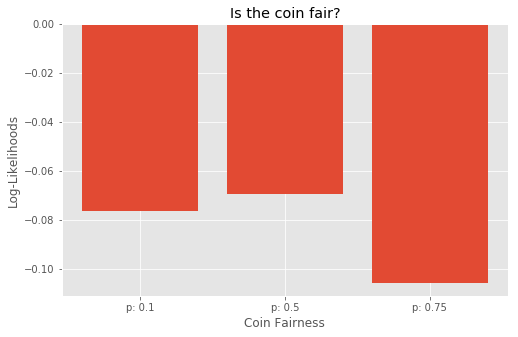

In [120]:
fig, ax = plt.subplots(1, figsize=(8, 5))
plot_coin_likelihood(ax, probs = probs, data=flips_ques)

<BarContainer object of 2 artists>

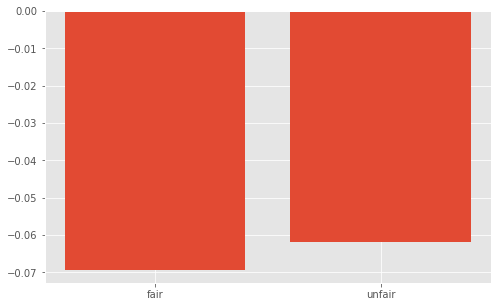

In [121]:
fig, ax = plt.subplots(1, figsize=(8, 5))

ax.bar(['fair','unfair'],coin_probs)

In [122]:
total_flip_lst = []
for i in range(10):
    total_flip_lst.append(flips_ques[:i+1])

In [123]:
probs = [0.25, 0.5]

In [124]:
total_flip_lst

[[1],
 [1, 0],
 [1, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0, 1],
 [1, 0, 0, 0, 1, 1],
 [1, 0, 0, 0, 1, 1, 0],
 [1, 0, 0, 0, 1, 1, 0, 0],
 [1, 0, 0, 0, 1, 1, 0, 0, 0],
 [1, 0, 0, 0, 1, 1, 0, 0, 0, 0]]

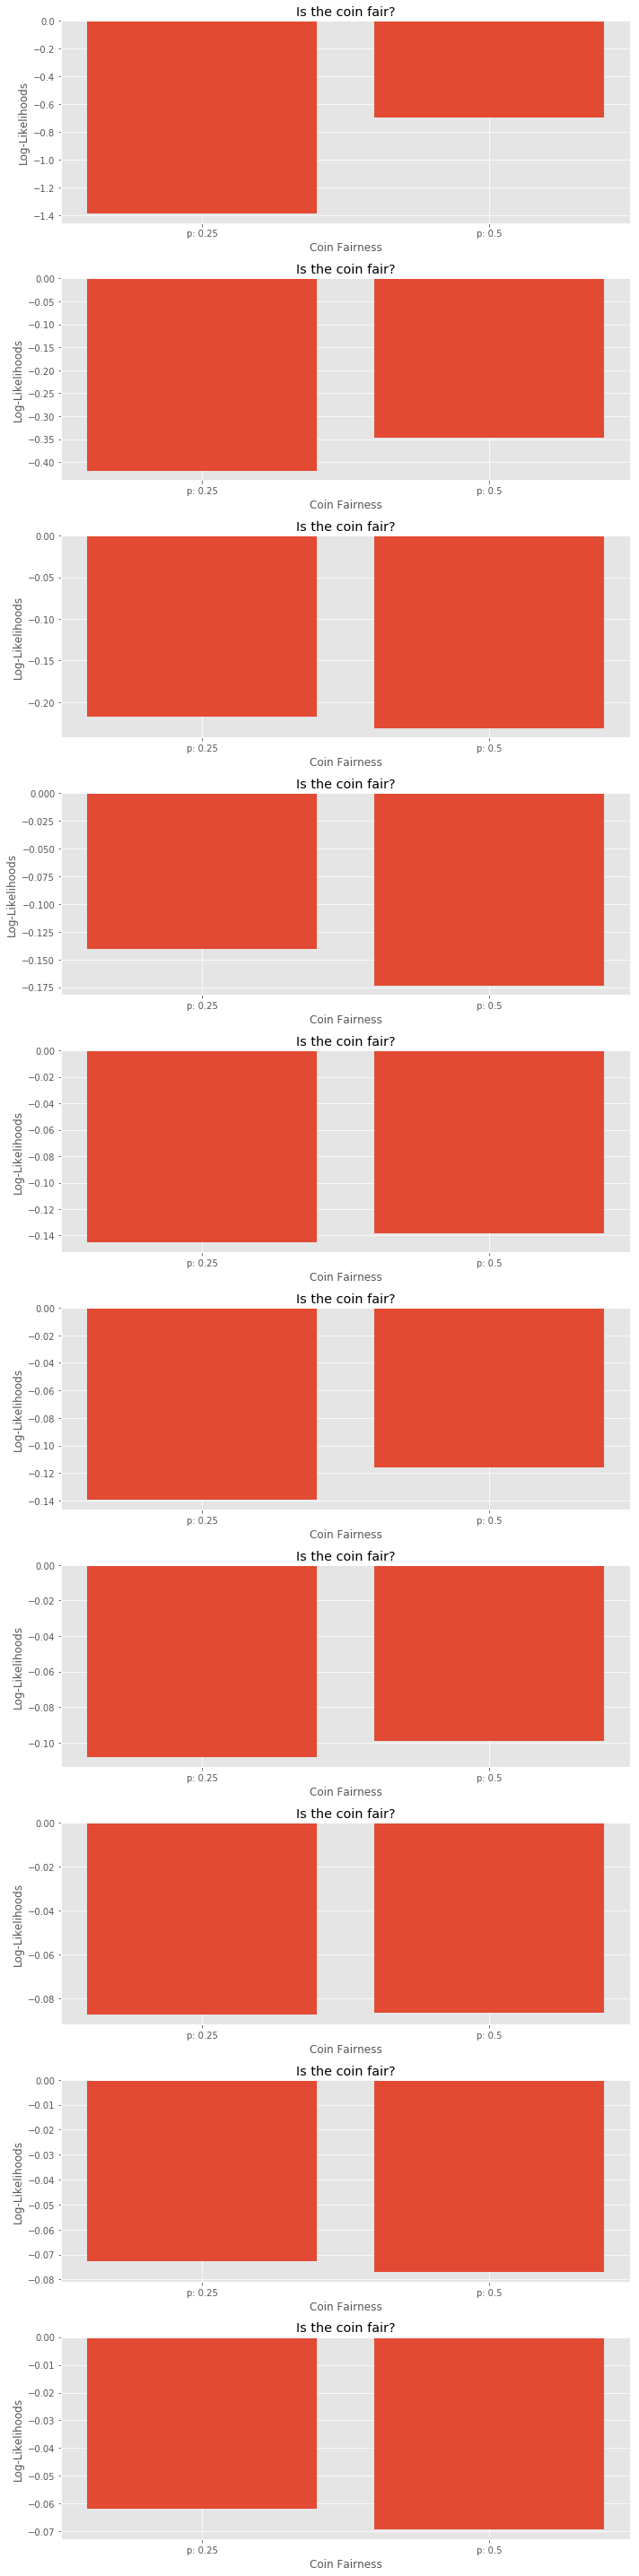

In [125]:
fig, ax = plt.subplots(10, figsize=(10,40))

for i in range(10): 
    plot_coin_likelihood(ax[i], probs = probs, data = total_flip_lst[i])

plt.tight_layout()

8\. Spend some time discussing how the likelihood of each possibility evolves as we flip the coin more and more.  Does the evolution make sense to you?


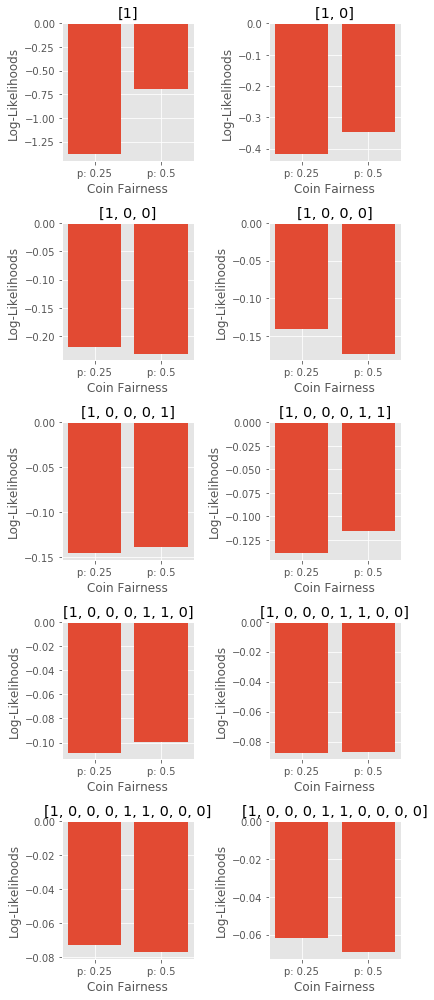

In [126]:
flips = [1, 0, 0, 0, 1, 1, 0, 0, 0, 0]
probs = [.25 , .5]
fig, ax = plt.subplots(5,2, figsize=(6,14))
count = 0
for i in [0,1,2,3,4]:
    for j in [0,1]:
        flp = flips[:count+1]
        plot_coin_likelihood(ax[i,j], probs, flp, str(flp))
        count += 1
        
plt.tight_layout()

In [127]:
# the more flips the more it approaches 0.5 

In [128]:
probabilities = np.linspace(0, 1, num=11);probabilities
probabilities = np.round(probabilities, 2)

In [129]:
for i in range(2):
    print(i)

0
1


/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


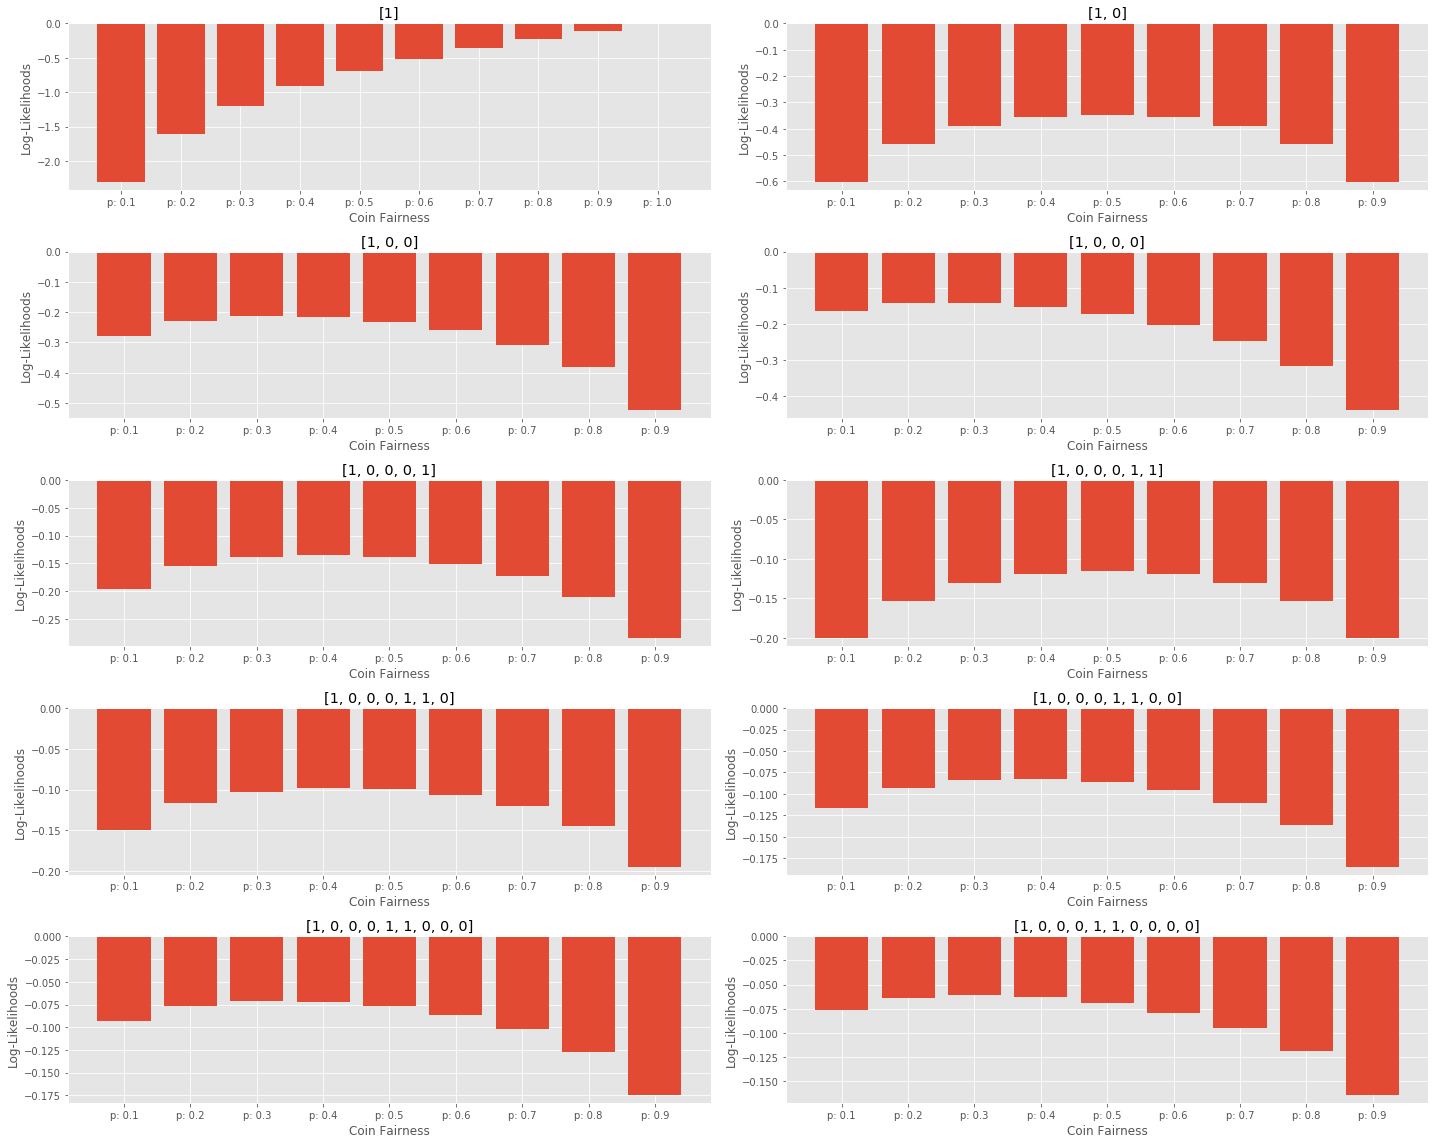

In [130]:
flips = [1, 0, 0, 0, 1, 1, 0, 0, 0, 0]
probabilities = np.round(np.linspace(0, 1, num=11),2)
fig, ax = plt.subplots(5,2, figsize=(20,16))
count = 0
for i in [0,1,2,3,4]:
    for j in [0,1]:
        flp = flips[:count+1]
        plot_coin_likelihood(ax[i,j], probabilities, flp, str(flp) )
        count += 1
    
plt.tight_layout()

In [131]:
def plot_coin_likelihood_continuous(ax, data):
    probabilities = np.round(np.linspace(0, 1, num=100),2)
    flp = flips[:count+1]
    return plot_coin_likelihood(ax, probabilities, data, str(data) ) #this returns ax

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


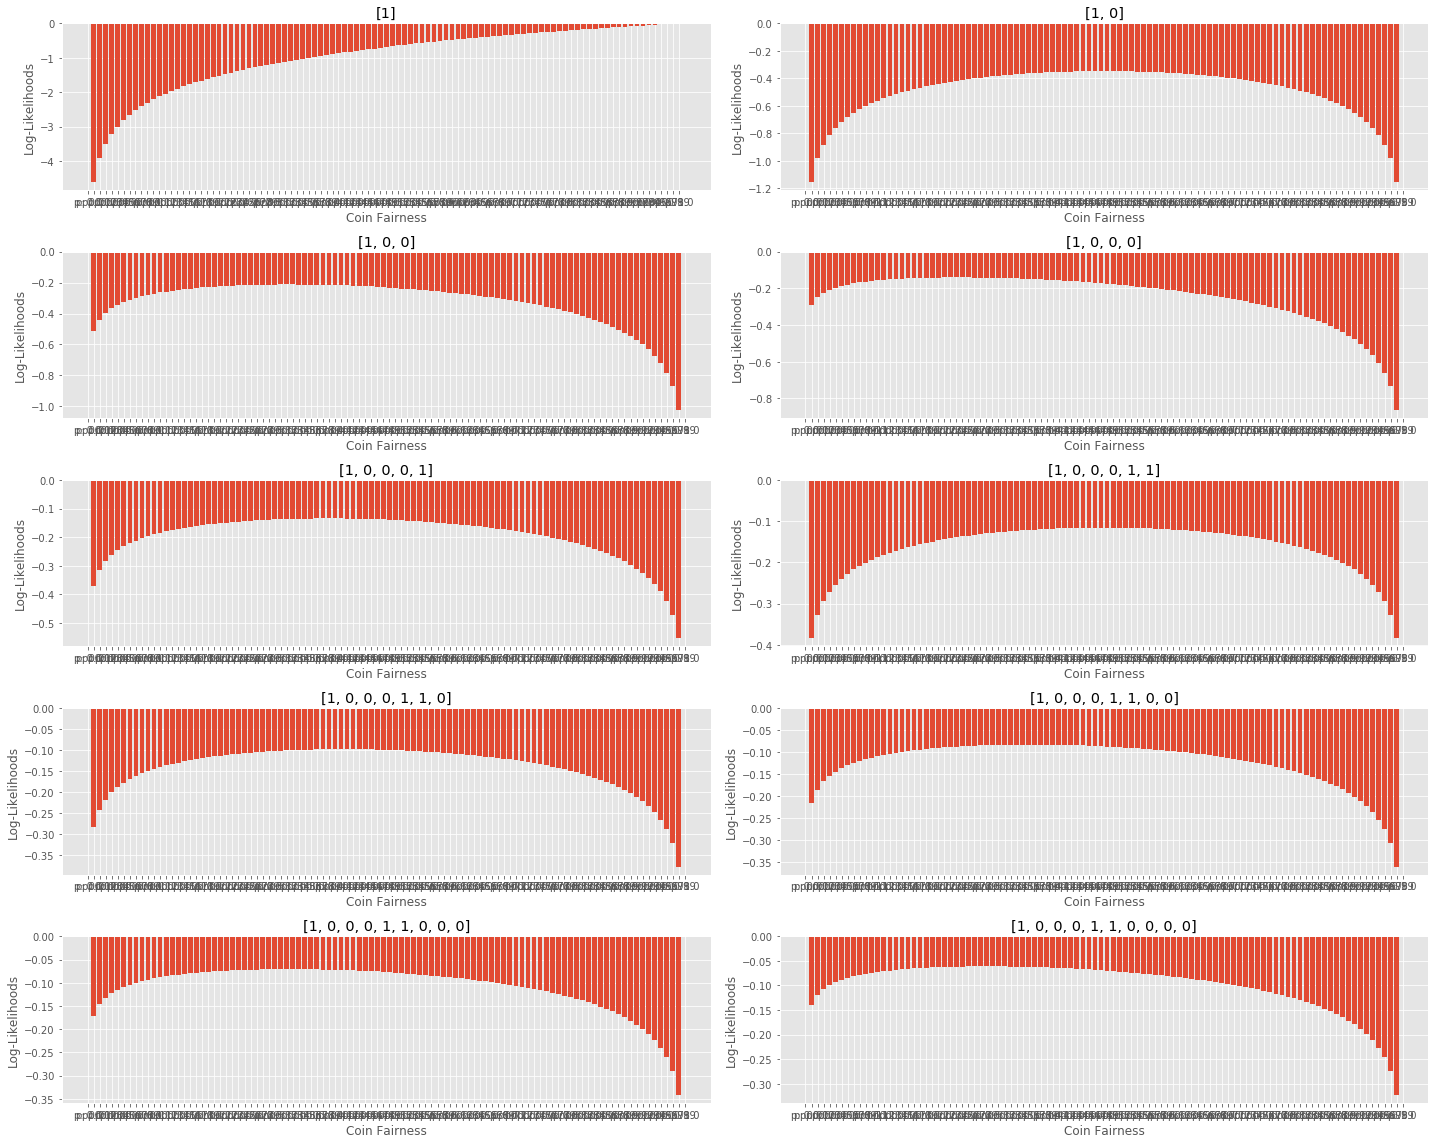

In [132]:
flips = [1, 0, 0, 0, 1, 1, 0, 0, 0, 0]
fig, ax = plt.subplots(5,2, figsize=(20,16))
count = 0
for i in [0,1,2,3,4]:
    for j in [0,1]:
        flp = flips[:count+1]
        plot_coin_likelihood_continuous(ax[i,j], flp )
        count += 1
    
plt.tight_layout()

In [133]:
def maximum_coin_likelihood(flips):
    probabilities = np.round(np.linspace(0, 1, num=100),2)
    max_p = 0
    for p in probabilities:
        if coin_log_likelihood(p,flips) > coin_log_likelihood(max_p,flips):
            max_p = p
    return max_p

In [134]:
flips = [1, 0, 0, 0, 1, 1, 0, 0, 0, 0]
maximum_coin_likelihood(flips)

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


0.3

In [141]:
def plot_coin_likelihood_continuous(ax, data):
    ps = np.linspace(0, 1, num=100)
    likelihoods = [coin_log_likelihood(p=p, flips=data) for p in ps]
    max_like_estimate = ps[np.argmax(likelihoods)]
    ax.plot(ps, likelihoods)
    ax.axvline(max_like_estimate, color='orange')
    ax.set_xlabel("$p$")
    ax.set_ylabel("Binomial Likelihood")
    ax.set_title(",".join(np.array(['T', 'H'])[data]))

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


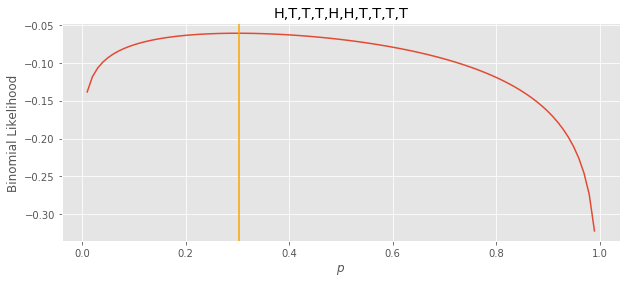

In [142]:
fig, ax = plt.subplots(figsize=(10, 4))

plot_coin_likelihood_continuous(ax, flips)



/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


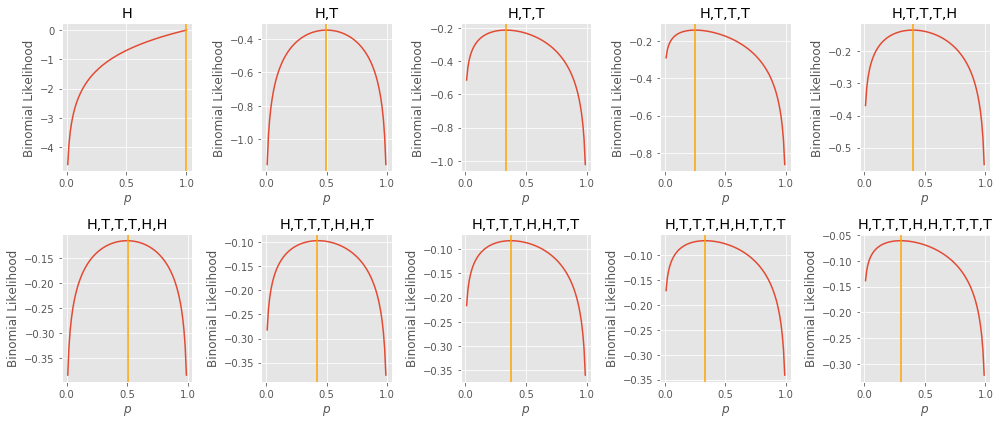

In [144]:
fig, axs = plt.subplots(2, 5, figsize=(14, 6))

for idx, ax in enumerate(axs.flatten(), start=1):
    plot_coin_likelihood_continuous(ax, data=flips[:idx])

fig.tight_layout()